In [1]:
# standard libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.simplefilter('ignore')
# sklearn
from sklearn.metrics.pairwise import *
from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.base import *
#visualing tools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_dataset.csv')
df.head(2)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.00836,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.08690,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify


Danceability


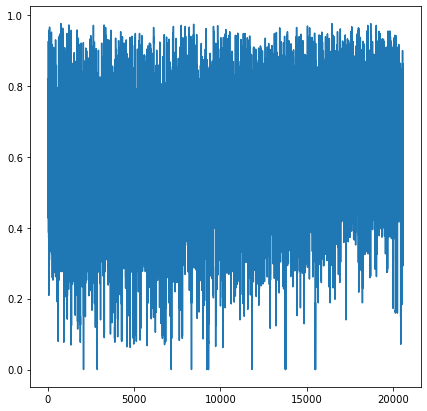

Energy


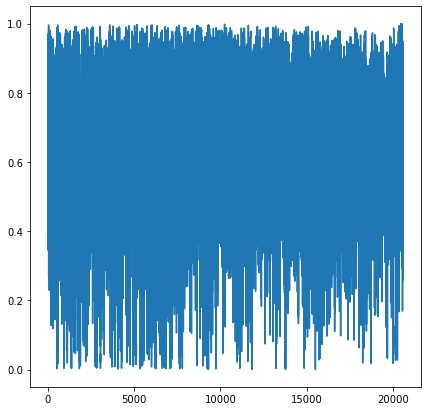

Loudness


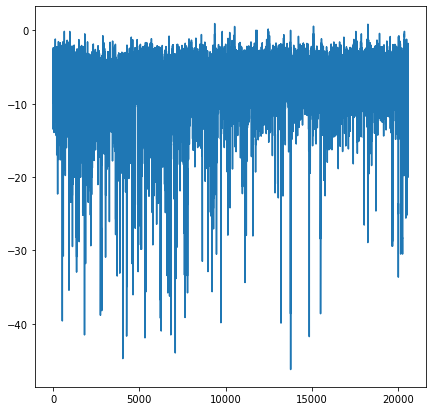

Speechiness


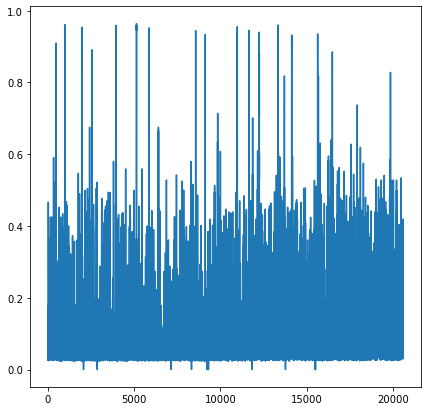

Acousticness


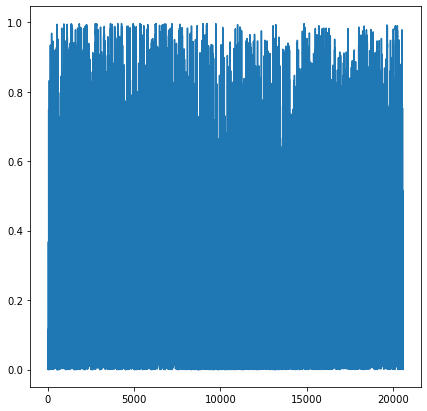

Instrumentalness


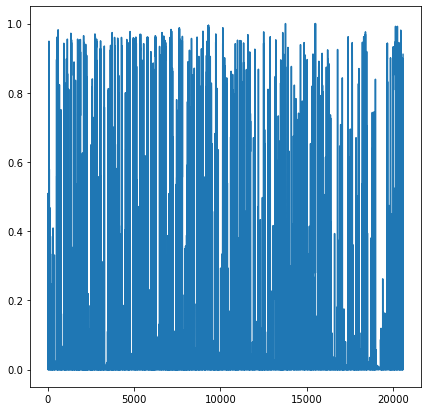

Liveness


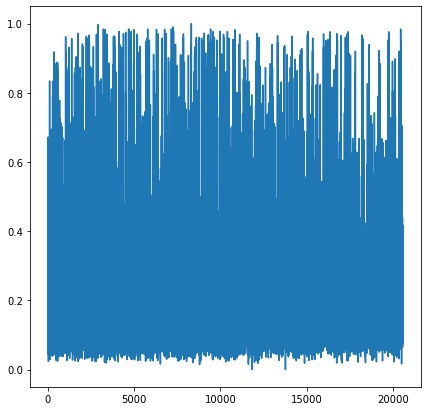

Valence


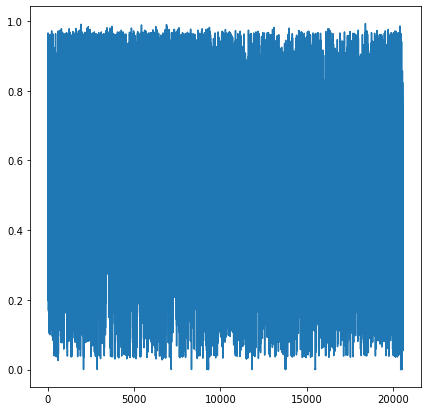

Tempo


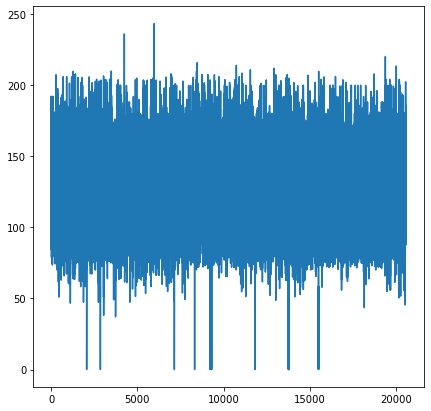

Duration_min


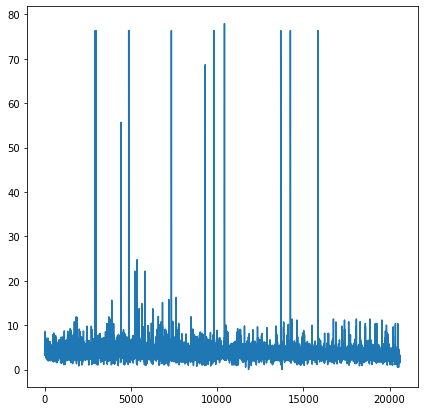

Views


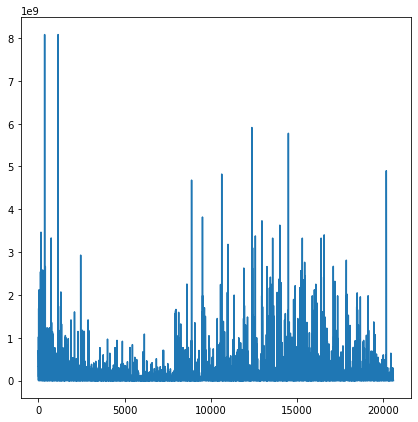

Likes


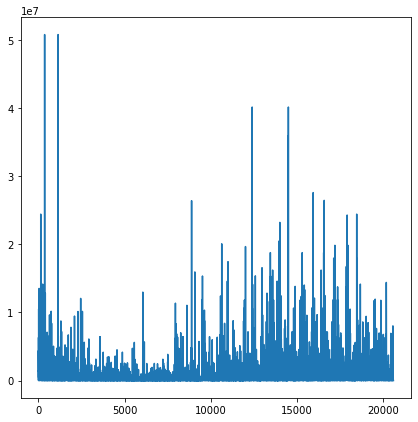

Comments


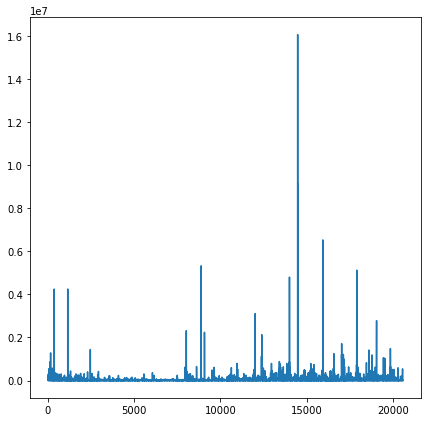

Stream


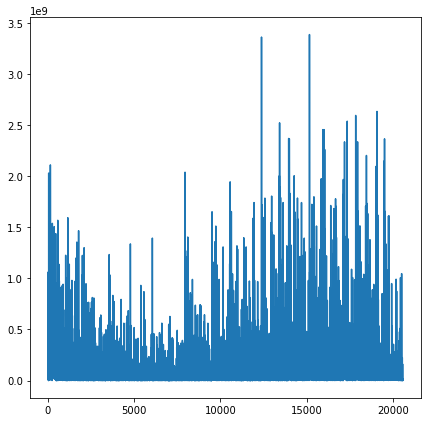

EnergyLiveness


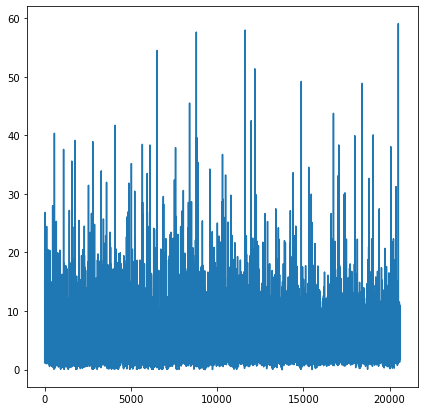

In [3]:

for i in df.columns:
    if type(df[i][1])!=str:
        print(i)
    
        plt.figure(figsize=(7,7))
        plt.plot(df[i])
        plt.show()

In [4]:
df.columns=['_'.join(c.split(' ')).lower() for c in df.columns]
df.columns


Index(['artist', 'track', 'album', 'album_type', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_min', 'title', 'channel',
       'views', 'likes', 'comments', 'licensed', 'official_video', 'stream',
       'energyliveness', 'most_playedon'],
      dtype='object')

In [5]:

df['licensed'].value_counts()

True     14060
False     6065
0          469
Name: licensed, dtype: int64

In [6]:
df['most_playedon'].value_counts()

Spotify    15694
Youtube     4900
Name: most_playedon, dtype: int64

In [7]:
df['album_type'].value_counts()

album          14834
single          4973
compilation      787
Name: album_type, dtype: int64

In [8]:
# filtering on 
# album_type = single & 
# licensed = True 
# most_playedon = Spotify
# (save memory consumption)
df = df[(df['album_type'] == 'single') & (df['licensed'] == 'True') & (df['most_playedon'] == 'Spotify')]
# reset index
df.reset_index(drop=True, inplace=True)
df.head()

,artist,track,album,album_type,danceability,energy,loudness,speechiness,acousticness,instrumentalness,...,title,channel,views,likes,comments,licensed,official_video,stream,energyliveness,most_playedon
0,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,63063467.0,7.956897,Spotify
1,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,-3.340,0.0465,0.003430,0.103000,...,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,True,True,42671901.0,2.809231,Spotify
2,Metallica,Lux Æterna,Lux Æterna,single,0.386,0.996,-2.960,0.0754,0.000012,0.000836,...,Metallica: Lux Æterna (Official Music Video),Metallica,14937918.0,473751.0,46230.0,True,True,20061385.0,8.586207,Spotify
3,Linkin Park,Numb / Encore,Numb / Encore: MTV Ultimate Mash-Ups Presents ...,single,0.687,0.793,-4.254,0.1660,0.060300,0.000000,...,Numb/Encore [Live] - Linkin Park & Jay Z,Linkin Park,44436981.0,226771.0,9260.0,True,True,778880225.0,1.362543,Spotify
4,Black Eyed Peas,Pump It Louder,Pump It Louder,single,0.660,0.942,-2.273,0.1850,0.007890,0.000018,...,Tiësto & Black Eyed Peas - Pump It Louder (Off...,Tiësto,2099141.0,61252.0,1238.0,True,True,27908495.0,1.129496,Spotify


In [9]:
df_to_be_scaled=df.select_dtypes('float')
sd=StandardScaler()
df_scaled=sd.fit_transform(df_to_be_scaled)

In [10]:
df_scaled

array([[ 0.24693424,  1.33018638,  0.75252357, ..., -0.14097687,
        -0.23818056,  0.56855468],
       [ 0.56344149,  1.27925725,  0.91793159, ...,  0.14106062,
        -0.32792884, -0.62713561],
       [-1.87916878,  1.70196899,  1.02446557, ...,  0.70819721,
        -0.42744327,  0.71472972],
       ...,
       [-1.48697501,  0.85654552,  0.54253949, ..., -0.30278159,
        -0.48833571, -0.02776981],
       [-1.66587041,  0.53569203,  0.73177748, ..., -0.30278159,
        -0.48548436,  0.36994647],
       [-1.10854244,  1.40658007,  0.58066744, ..., -0.30278159,
        -0.49067069,  0.32237753]])

In [11]:
def recommendation(song_title):
   
    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    # Create a list with model name
    top_songs_list = [cosine_similarity, song_title]
    # Get song indices
    index=indices[song_title]
    index
    cosine = cosine_similarity(df_scaled)
# Get list of songs for given songs
    score=list(enumerate(cosine[indices[song_title]]))
    score
# Sort the most similar songs
    similarity_score = sorted(score,key = lambda x:x[1],reverse = True)
    similarity_score
# Select the top-n recommend songs
    similarity_score = similarity_score[1:11]
    similarity_score
    top_songs_index = [i[0] for i in similarity_score]
    top_songs_index
# Top 10 recommended songs
    top_songs=df['title'].iloc[top_songs_index]
    top_songs=[i for i in enumerate(top_songs,start=1)]
    return top_songs

In [12]:
song_title=df['title'][9]

In [13]:
x=df['title'][6]
x

'P!nk - Raise Your Glass (Official Video)'

In [14]:
recommendation(x)

[(1,
  'LUDMILLA, Mariah Angeliq, Topo La Maskara - Socadona feat. Mr Vegas (Official Music Video)'),
 (2,
  'Joel Corry x Jax Jones - OUT OUT (feat. Charli XCX & Saweetie) [Official Lyric Video]'),
 (3,
  'Joel Corry x Jax Jones - OUT OUT (feat. Charli XCX & Saweetie) [Official Lyric Video]'),
 (4,
  'Joel Corry x Jax Jones - OUT OUT (feat. Charli XCX & Saweetie) [Official Lyric Video]'),
 (5, 'Ofenbach - Be Mine (Official Video)'),
 (6,
  'Galantis, David Guetta & Little Mix - Heartbreak Anthem (Official Music Video)'),
 (7,
  'Galantis, David Guetta & Little Mix - Heartbreak Anthem (Official Music Video)'),
 (8,
  'Galantis, David Guetta & Little Mix - Heartbreak Anthem (Official Music Video)'),
 (9, 'MK, Jonas Blue, Becky Hill - Back & Forth (Lyric Video)'),
 (10, 'Joel Corry x MNEK - Head & Heart [Official Video]')]